# Data analysis on heart disease directory 

Group 10: 

## Intoduction:
    Though treatment has advanced tremendously, the prevalence of heart disease has continued to rise in lower-income communities, contributing to the pervasiveness of cardiovascular disease as a leading cause of premature death (Bowry et al. 1151). Similarly, this trend is reflected in Canada, with the 11.3% increase in adults with cardiovascular disease occurring mostly in lower income areas despite the overall decline of heart disease in the general population in 2016 (Dai et al. 2). 
    
    Therefore, there exists a push for more efficient  methods of diagnosing individuals at high risk of heart disease. Consequently, we aim to ascertain the severity of heart disease for unique individuals by analyzing a list of attributes taken from a dataset from Cleveland Clinic Foundation. (Detrano et al. 305) The raw dataset was refined by David W. Aha to create the processed dataset that we will utilize. (UCI Machine Learning Repository: Heart Disease Data Set) 
    
    This dataset contains 14 attributes of which we isolated six for the purposes of our analysis namely, 
* age in years, 
* sex, 
* resting blood pressure (trestbps), 
* chest pain type (cp), 
* number of major blood vessels coloured by fluoroscopy (ca) 
* the diagnosis of heart disease (num). 


Loading the libraries needed for data analysis.

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

Downloading dataset from the Web and reading into a dataframe.

In [2]:
my_url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
download.file(my_url, "cleveland.csv")
cleveland_sel <- read_csv("cleveland.csv", col_names = FALSE)
cleveland_sel <- rename(cleveland_sel, "age" = X1,
                     "sex" = X2,
                     "cp" = X3,
                     "trestbps" = X4,
                     "chol" = X5,
                     "fbs" = X6,
                     "restecg" = X7,
                     "thalach" = X8,
                     "exnag" = X9,
                     "oldpeak" = X10,
                     "slope" = X11,
                     "ca" = X12,
                     "thal" = X13,
                     "num" = X14)

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double(),
  X10 = col_double(),
  X11 = col_double(),
  X12 = col_character(),
  X13 = col_character(),
  X14 = col_double()
)



In [3]:
cleveland_df_sel<-select(cleveland_sel,age, sex, cp, trestbps, ca, num)
cleveland_df_sel

age,sex,cp,trestbps,ca,num
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
63,1,1,145,0.0,0
67,1,4,160,3.0,2
67,1,4,120,2.0,1
⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,1.0,3
57,0,2,130,1.0,1
38,1,3,138,?,0


In [4]:
cleveland_df_sel_f <- filter(cleveland_df_sel, ca != "?") 
cleveland_df_sel_f


age,sex,cp,trestbps,ca,num
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
63,1,1,145,0.0,0
67,1,4,160,3.0,2
67,1,4,120,2.0,1
⋮,⋮,⋮,⋮,⋮,⋮
68,1,4,144,2.0,2
57,1,4,130,1.0,3
57,0,2,130,1.0,1


In [5]:
num_Patients_male <- filter(cleveland_df_sel_f, sex == 1) %>%  nrow()
num_Patients_male
num_Patients_famale <- filter(cleveland_df_sel_f, sex == 0) %>%  nrow()
num_Patients_famale

[1] 202

[1] 97

In [6]:
#num_patience<-nrow(cleveland_df_sel)
#num_patience

num_Patients <- cleveland_df_sel_f %>% summarize(n_patients = n())
num_Patients

n_patients
<int>
299


In [7]:
n_each_gender <- cleveland_df_sel_f %>% group_by(sex) %>% summarize(n= n())

n_each_gender <- pivot_wider(n_each_gender, names_from = sex, values_from = n)

n_each_gender <- 
        rename(n_each_gender, 
              "female" = "0",
              "male" = "1") %>% mutate("female" = as.character(female), "male" = as.character(male))

n_each_gender <- pivot_longer(n_each_gender, cols = female:male, names_to = "Sex", values_to = "n") %>% mutate(n = as.numeric(n))

n_each_gender 


`summarise()` ungrouping output (override with `.groups` argument)



Sex,n
<chr>,<dbl>
female,97
male,202


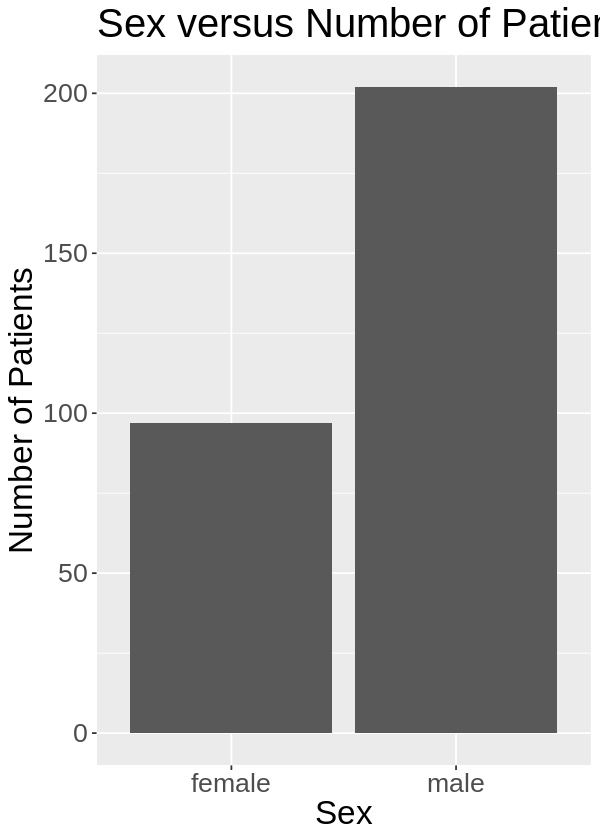

In [8]:
options(repr.plot.width = 5, repr.plot.height = 7)

sex_bar<- ggplot(n_each_gender, aes(x = Sex, y = n)) + 
    geom_bar(stat = "identity") +
    xlab("Sex") +
    ylab("Number of Patients")+
    theme(text = element_text(size = 20))+ 
    ggtitle("Sex versus Number of Patients")

sex_bar

In [9]:

mean_age <- cleveland_df_sel_f %>% group_by(sex) %>% summarize(avg = mean(age))

mean_age <- pivot_wider(mean_age, names_from = sex, values_from = avg)

mean_age <- 
        rename(mean_age, 
              "female" = "0",
              "male" = "1") %>% mutate("female" = as.character(female), "male" = as.character(male))

mean_age <- pivot_longer(mean_age, cols = female:male, names_to = "sex", values_to = "avg_age") %>% mutate(avg_age = as.numeric(avg_age))

mean_age


`summarise()` ungrouping output (override with `.groups` argument)



sex,avg_age
<chr>,<dbl>
female,55.72165
male,53.95545


In [10]:
n_chest_pain <- cleveland_df_sel_f %>% group_by(cp) %>% summarize(n = n())

n_chest_pain <- pivot_wider(n_chest_pain, names_from = cp, values_from = n)

n_chest_pain <- 
        rename(n_chest_pain, 
              "typical_angina" = "1",
              "atypical_angina" = "2", "Non_anginal_pain" = "3", "Asymptomatic" = "4") #%>% mutate("female" = as.character(female), "male" = as.character(male))

n_chest_pain <- pivot_longer(n_chest_pain, cols = typical_angina:Asymptomatic, names_to = "chest_pain", values_to = "n") %>% mutate(n = as.numeric(n))


n_chest_pain


`summarise()` ungrouping output (override with `.groups` argument)



chest_pain,n
<chr>,<dbl>
typical_angina,23
atypical_angina,49
Non_anginal_pain,84
Asymptomatic,143


In [11]:
young_adult_bps <- cleveland_df_sel_f %>%
select(age,trestbps) %>%
filter(between(age,18, 35))

middle_adult_bps <- cleveland_df_sel_f %>%
select(age,trestbps) %>%
filter(between(age,36, 55))

old_adult_bps <- cleveland_df_sel_f %>%
select(age, trestbps) %>%
filter(between(age,55,77))

max_young_trestbps <- young_adult_bps %>% 
    arrange(desc(trestbps))%>% 
    head(n=1)

min_young_trestbps <- young_adult_bps %>% 
    arrange(desc(trestbps)) %>%
    tail(n=1)

max_middle_trestbps <- middle_adult_bps %>% 
    arrange(desc(trestbps)) %>%
    head(n=1)

min_middle_trestbps <- middle_adult_bps %>% 
    arrange(desc(trestbps)) %>%
    tail(n=1)

max_old_trestbps <- old_adult_bps %>% 
    arrange(desc(trestbps)) %>%
    head(n=1)

min_old_trestbps <- old_adult_bps %>% 
    arrange(desc(trestbps)) %>%
    tail(n=1)


max_young_trestbps
min_young_trestbps

max_middle_trestbps
min_middle_trestbps

max_old_trestbps
min_old_trestbps


age,trestbps
<dbl>,<dbl>
35,138


age,trestbps
<dbl>,<dbl>
34,118


age,trestbps
<dbl>,<dbl>
54,192


age,trestbps
<dbl>,<dbl>
39,94


age,trestbps
<dbl>,<dbl>
56,200


age,trestbps
<dbl>,<dbl>
58,100


In [12]:
mean_rbp <- cleveland_df_sel_f %>% group_by(ca) %>% summarize(avg_rbp = mean(trestbps))
mean_rbp

`summarise()` ungrouping output (override with `.groups` argument)



ca,avg_rbp
<chr>,<dbl>
0.0,130.9545
1.0,129.6308
2.0,135.7105
3.0,136.9000


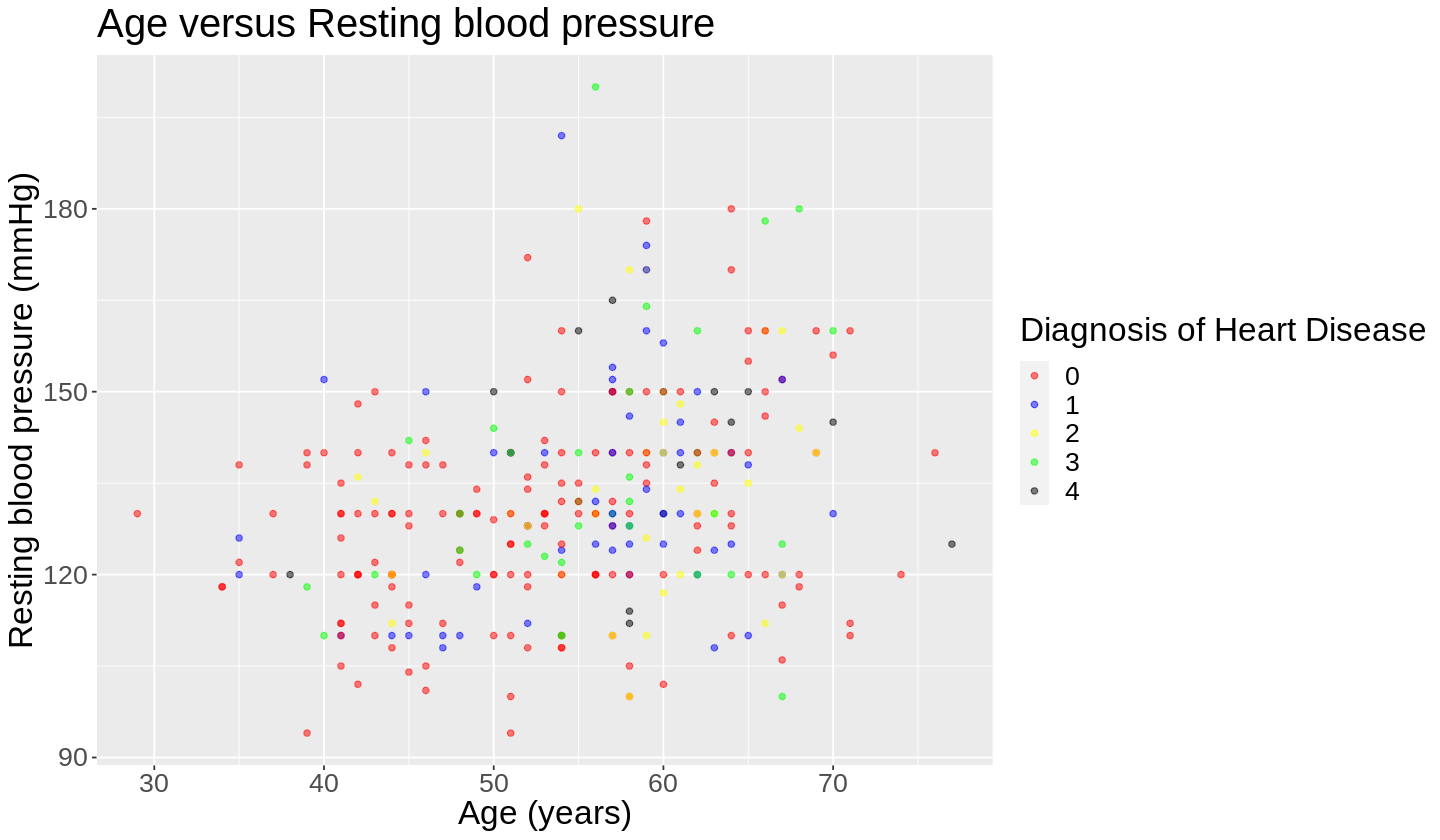

In [13]:
options(repr.plot.width = 12, repr.plot.height = 7)

age_vs_rbps_plot <- ggplot(cleveland_df_sel_f, aes(x = age, y = trestbps, color = as_factor(num))) +
                    geom_point(alpha = 0.5) +
                    labs(x = "Age (years)", y = "Resting blood pressure (mmHg)", color = "Diagnosis of Heart Disease") +
                    theme(text = element_text(size = 20)) + 
                    ggtitle("Age versus Resting blood pressure") +
                    scale_color_manual(labels = c("0", "1","2","3","4"), values = c("red","blue","yellow","green","black"))
age_vs_rbps_plot

## Methods:
We plan to find the relation between these five variables we chose with the possibility of getting heart disease. We will discover which variable has the most influence on heart disease. 
* We are going to pick five variables total, of which are (1)age, (2)sex, (3)resting blood pressure, (4)chest pain type, and (5)the number of major blood vessels colored by fluoroscopy. We select the number level of heart disease presence as our target variable, which means we are going to compare each of our five variables with the num.

* In our project, we will use bar plot for the variable sex, as this is a categorical variable and we want to make comparison. Then we choose scatter plots for the rest of our variables because they are all quantitative variables and we  would like to find the relationships between them.



## Expected outcomes and significance
Increasing age and the risk of contracting a heart disease has been consistently shown to be positively correlated (Roth et al. 2985) and the average lifestyle men lead typically incorporates more high risk factors for heart disease, such as smoking compared to women. (Dai et al. 6) As such, older men are more likely to contract cardiovascular diseases, and we would expect to see this reflected in our results. 

* Through this project, we hope to create a classification model that can contribute to the ongoing effort to help healthcare workers efficiently target individuals at risk of developing heart disease or quickly identify the severity of the disease for patients.  

* It is noteworthy that the dataset that we used to train our model was formed from data collected over a time period of May 1981 to 1984. (Detrano et al. 305) Therefore, there is a possibility that there has been changes in the 

* The data that we collected is in 20 century. If we can find new data in the 21 century, what is the difference between the two data? Which variable will have a huge difference. Whether they will be a new variable, have a more significant impact on heart disease.


## Bibliography 

Bowry, Ashna D. K., et al. ‘The Burden of Cardiovascular Disease in Low- and Middle-Income Countries: Epidemiology and Management’. Canadian Journal of Cardiology, vol. 31, no. 9, Sept. 2015, pp. 1151–59. DOI.org (Crossref), https://doi.org/10.1016/j.cjca.2015.06.028.

Dai, Haijiang, et al. ‘Regional and Socioeconomic Disparities in Cardiovascular Disease in Canada during 2005–2016: Evidence from Repeated Nationwide Cross-Sectional Surveys’. BMJ Global Health, vol. 6, no. 11, Nov. 2021, p. e006809. DOI.org (Crossref), https://doi.org/10.1136/bmjgh-2021-006809.

Detrano, Robert, et al. ‘International Application of a New Probability Algorithm for the Diagnosis of Coronary Artery Disease’. The American Journal of Cardiology, vol. 64, no. 5, Aug. 1989, pp. 304–10. ScienceDirect, https://doi.org/10.1016/0002-9149(89)90524-9.

UCI Machine Learning Repository: Heart Disease Data Set. https://archive.ics.uci.edu/ml/datasets/Heart+Disease. Accessed 3 Mar. 2022.

Roth, Gregory A., et al. ‘Global Burden of Cardiovascular Diseases and Risk Factors, 1990–2019’. Journal of the American College of Cardiology, vol. 76, no. 25, Dec. 2020, pp. 2982–3021. DOI.org (Crossref), https://doi.org/10.1016/j.jacc.2020.11.010.
